# Rabbits vs Sheeps

Considering the dynamic system
$$
\dot{x} = x(3 - ax - by)
$$

$$
\dot{y} = y(2 - x - y)
$$

describing the competition between rabbits `x` and sheeps `y` for the same resources in one given environment, with:

- `a > 0` inverse of the carrying capacity of the environment for rabbits;
- `b > 0` coefficient of competition

The considered case is when `a = 2` and `b = 1`.


## Fixed points and Stability

Knowing the values of `a` and `b`, there is:

$$
\dot{x} = x(3 - 2x - y)
$$

$$
\dot{y} = y(2 - x - y)
$$

To identify the equilibrium points, the two equations are to be solved simultaneously:



In [2]:
# Imports:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp
from IPython.display import Math, display

The `calculate_equilibria` function defines symbolic variables and equations:


In [3]:
def calculate_equilibria():
    x, y = sp.symbols("x y")

    # Define the system:
    dx_dt = x * (3 - 2 * x - y)
    dy_dt = y * (2 - x - y)

    # Find equilibrium points by solving dx_dt = 0 and dy_dt = 0:

    # Case 1: x = 0
    eq1 = sp.solve(dy_dt.subs(x, 0), y)
    points_x0 = [(0, float(y_val)) for y_val in eq1]

    # Case 2: y = 0
    eq2 = sp.solve(dx_dt.subs(y, 0), x)
    points_y0 = [(float(x_val), 0) for x_val in eq2]

    # Case 3: Both factors non-zero
    eq3 = sp.solve([3 - 2 * x - y, 2 - x - y], [x, y])
    points_other = [(float(eq3[x]), float(eq3[y]))]

    # Combine all points and filter duplicates:
    all_points = points_x0 + points_y0 + points_other
    unique_points = []
    for p in all_points:
        if not any(np.allclose(p, existing) for existing in unique_points):
            unique_points.append(p)

    return unique_points

### System Function

The `system` function defines the system of differential equations:


In [4]:
def system(t, z):
    x, y = z

    # Derivative of the system's functions:
    dx_dt = x * (3 - 2 * x - y)
    dy_dt = y * (2 - x - y)
    return [dx_dt, dy_dt]

### Plotting Function

In [5]:
def plot_phase_portrait():

    # Calculating equilibrium points:
    equilibria = calculate_equilibria()
    print("Calculated equilibrium points:")
    for point in equilibria:
        dx, dy = system(0, point)
        print(f"({point[0]}, {point[1]})")

    # Creating a grid of points:
    x = np.linspace(-0.5, 3, 20)
    y = np.linspace(-0.5, 3, 20)
    X, Y = np.meshgrid(x, y)

    # Calculating derivatives at each point:
    DX, DY = np.zeros_like(X), np.zeros_like(Y)
    for i in range(len(x)):
        for j in range(len(y)):
            dx, dy = system(0, [X[j, i], Y[j, i]])
            DX[j, i] = dx
            DY[j, i] = dy

    # Normalizing for better visualization:
    M = np.sqrt(DX**2 + DY**2)
    M[M == 0] = 1  # Avoid division by zero error
    DX = DX / M
    DY = DY / M

    # Plot phase portrait:
    plt.figure(figsize=(10, 8))
    plt.quiver(X, Y, DX, DY, M, pivot="mid", cmap=plt.cm.viridis)
    plt.colorbar()

    # Plot equilibrium points:
    eq_x, eq_y = zip(*equilibria)
    plt.plot(eq_x, eq_y, "ro", markersize=8)

    # Plot some trajectories:
    initial_conditions = [
        (0.5, 0.5),
        (0.5, 1.5),
        (1.5, 1.5),
        (1.5, 0.5),
        (0.1, 0.1),
        (0.1, 2.1),
        (1.6, 0.1),
        (1.1, 1.1),
    ]

    t_span = (0, 10)
    t_eval = np.linspace(0, 10, 1000)

    for init in initial_conditions:
        sol = solve_ivp(system, t_span, init, t_eval=t_eval, method="RK45")
        plt.plot(sol.y[0], sol.y[1], "k-", linewidth=1)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Phase Portrait of the System")
    plt.grid(True)
    plt.axis([min(x), max(x), min(y), max(y)])
    plt.show()

    return equilibria

### Running the analysis

Calculated equilibrium points:
(0, 0.0)
(0, 2.0)
(1.5, 0)
(1.0, 1.0)


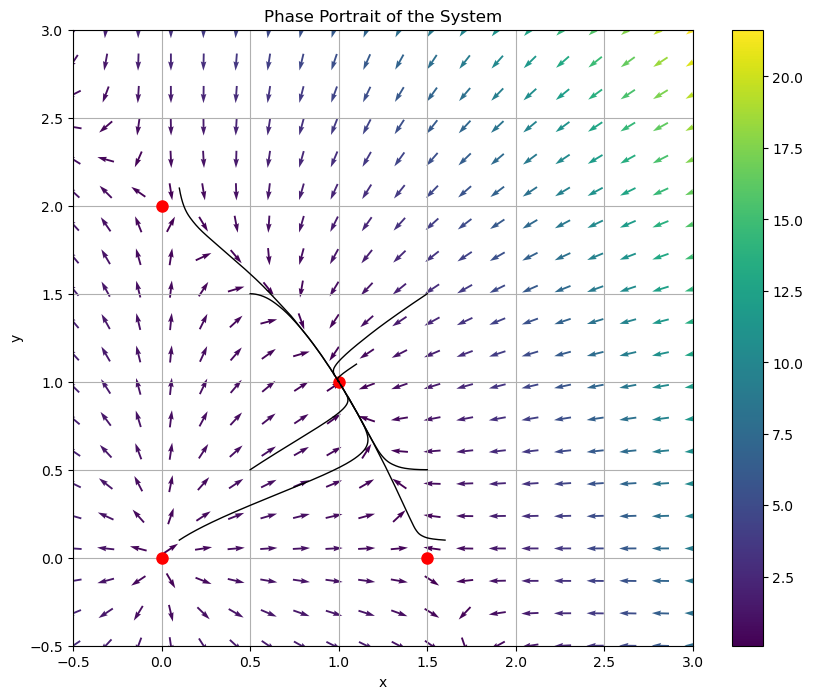

In [6]:
equilibria = plot_phase_portrait()

### Jacobian Matrix calculation
Calculate the Jacobian matrix and evaluate at all fixed points
using LaTeX display for all matrices

In [7]:
def calculate_jacobian_and_fixed_points():

    x, y = sp.symbols("x y")

    # Defining the system:
    dx_dt = x * (3 - 2 * x - y)
    dy_dt = y * (2 - x - y)

    # Calculating partial derivatives:
    df_dx = sp.diff(dx_dt, x)
    df_dy = sp.diff(dx_dt, y)
    dg_dx = sp.diff(dy_dt, x)
    dg_dy = sp.diff(dy_dt, y)

    # Creating the symbolic Jacobian matrix:
    symbolic_jacobian = sp.Matrix([[df_dx, df_dy], [dg_dx, dg_dy]])

    # Displaying the symbolic Jacobian in LaTeX:
    display(Math(r"J(x,y) = " + sp.latex(symbolic_jacobian)))

    # Getting equilibrium points:
    equilibria = calculate_equilibria()

    # Calculating and display Jacobian at each equilibrium point:
    for point in equilibria:
        x_val, y_val = point

        # Substituting values to get numerical Jacobian:
        J_at_point = symbolic_jacobian.subs([(x, x_val), (y, y_val)])

        # Calculating eigenvalues:
        eigenvalues = J_at_point.eigenvals()
        eigenvalues_list = list(eigenvalues.keys())

        # Displaying Jacobian at this point in LaTeX:
        display(Math(r"J({0}, {1}) = {2}".format(x_val, y_val, sp.latex(J_at_point))))

        # Displaying eigenvalues in LaTeX:
        display(Math(r"Eigenvalues: \lambda = " + sp.latex(eigenvalues_list)))

        # Determining stability based on eigenvalues:
        real_parts = [complex(ev).real for ev in eigenvalues_list]

        if all(r < 0 for r in real_parts):
            stability = "Stable (attracting)"
        elif all(r > 0 for r in real_parts):
            stability = "Unstable (repelling)"
        elif all(r == 0 for r in real_parts):
            stability = "Center or non-hyperbolic"
        else:
            stability = "Saddle point"

        print(f"Stability at ({x_val}, {y_val}): {stability}\n")

    return symbolic_jacobian

# Calculating and display Jacobian at all fixed points:
J = calculate_jacobian_and_fixed_points()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Stability at (0, 0.0): Unstable (repelling)



<IPython.core.display.Math object>

<IPython.core.display.Math object>

Stability at (0, 2.0): Saddle point



<IPython.core.display.Math object>

<IPython.core.display.Math object>

Stability at (1.5, 0): Saddle point



<IPython.core.display.Math object>

<IPython.core.display.Math object>

Stability at (1.0, 1.0): Stable (attracting)



The analysis of the eigenvectors also made it possible to identify linear varieties in the vicinity of the fixed points. For each fixed point and eigenvalue, the following system of differential equations was solved:

$$
\left[
\begin{array}{cc}
\frac{\partial \dot{x}}{\partial x} - \lambda & \frac{\partial \dot{x}}{\partial y} \\
\frac{\partial \dot{y}}{\partial x} & \frac{\partial \dot{y}}{\partial y} - \lambda
\end{array}
\right]
\left[
\begin{array}{c}
v_1 \\
v_2
\end{array}
\right]
=
\left[
\begin{array}{c}
0 \\
0
\end{array}
\right]
$$

In [8]:
def calculate_eigenvectors():
    """
    Calculate eigenvectors for each fixed point and eigenvalue
    """

    # Define symbolic variables
    x, y = sp.symbols("x y")

    # Define the system
    dx_dt = x * (3 - 2 * x - y)
    dy_dt = y * (2 - x - y)

    # Calculate the Jacobian matrix
    df_dx = sp.diff(dx_dt, x)
    df_dy = sp.diff(dx_dt, y)
    dg_dx = sp.diff(dy_dt, x)
    dg_dy = sp.diff(dy_dt, y)

    jacobian = sp.Matrix([[df_dx, df_dy], [dg_dx, dg_dy]])

    # Get equilibrium points
    equilibria = calculate_equilibria()

    print("Analysis of eigenvectors at fixed points:")
    print("----------------------------------------")

    for point in equilibria:
        x_val, y_val = point

        # Evaluate Jacobian at this fixed point
        J_at_point = jacobian.subs([(x, x_val), (y, y_val)])

        # Calculate eigenvalues and eigenvectors
        eigensystem = J_at_point.eigenvects()

        print(f"\nAt fixed point ({x_val}, {y_val}):")

        # Display the Jacobian at this point
        display(Math(r"J = " + sp.latex(J_at_point)))

        # Process each eigenvalue and its eigenvectors
        for eigenvalue, multiplicity, eigenvectors in eigensystem:
            # Display the eigenvalue and its multiplicity
            display(
                Math(
                    r"\lambda = "
                    + sp.latex(eigenvalue)
                    + r", \text{multiplicity} = "
                    + str(multiplicity)
                )
            )

            # For each eigenvalue, set up and display the eigenvector equation
            # (J - λI)v = 0
            lambda_I = eigenvalue * sp.eye(2)
            eigenvector_equation = J_at_point - lambda_I

            display(
                Math(
                    r"(J - \lambda I)v = "
                    + sp.latex(eigenvector_equation)
                    + r"\begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}"
                )
            )

            # Display the eigenvectors
            for i, vec in enumerate(eigenvectors):
                # Normalize the eigenvector for cleaner display
                norm = sp.sqrt(sum(v**2 for v in vec))
                if norm != 0:
                    normalized_vec = vec / norm
                else:
                    normalized_vec = vec

                display(Math(r"v_{" + str(i + 1) + r"} = " + sp.latex(normalized_vec)))

                # Convert to numerical values for clarity
                numerical_vec = np.array(normalized_vec).astype(float)
                print(
                    f"Numerical eigenvector: [{numerical_vec[0, 0]:.4f}, {numerical_vec[1, 0]:.4f}]"
                )

            # Solve the system of differential equations for this eigenvalue
            # This is equivalent to finding the nullspace of (J - λI)
            print(f"Nullspace of (J - λI):")
            nullspace = eigenvector_equation.nullspace()

            for i, basis_vector in enumerate(nullspace):
                # Normalize for clarity
                norm = sp.sqrt(sum(v**2 for v in basis_vector))
                if norm != 0:
                    normalized_vec = basis_vector / norm
                else:
                    normalized_vec = basis_vector

                display(Math(r"v_{" + str(i + 1) + r"} = " + sp.latex(normalized_vec)))

        # Identify the linear varieties (eigenspaces)
        print("\nLinear varieties (eigenspaces):")
        for eigenvalue, _, eigenvectors in eigensystem:
            if len(eigenvectors) > 0:
                v = eigenvectors[0]
                # Normalize the eigenvector
                norm = sp.sqrt(sum(elem**2 for elem in v))
                if norm != 0:
                    v = v / norm

                # The equation of the line through the fixed point in the direction of v is:
                # (x-x0, y-y0) = t * v for t ∈ ℝ
                line_eq = f"(x-{x_val}, y-{y_val}) = t·({float(v[0]):.4f}, {float(v[1]):.4f}), t ∈ ℝ"
                print(f"Eigenvalue λ = {float(eigenvalue):.4f}: {line_eq}")

    return equilibria


# Calculate eigenvectors for all fixed points
calculate_eigenvectors()

Analysis of eigenvectors at fixed points:
----------------------------------------

At fixed point (0, 0.0):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [0.0000, 1.0000]
Nullspace of (J - λI):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [1.0000, 0.0000]
Nullspace of (J - λI):


<IPython.core.display.Math object>


Linear varieties (eigenspaces):
Eigenvalue λ = 2.0000: (x-0, y-0.0) = t·(0.0000, 1.0000), t ∈ ℝ
Eigenvalue λ = 3.0000: (x-0, y-0.0) = t·(1.0000, 0.0000), t ∈ ℝ

At fixed point (0, 2.0):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [0.8321, -0.5547]
Nullspace of (J - λI):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [0.0000, 1.0000]
Nullspace of (J - λI):


<IPython.core.display.Math object>


Linear varieties (eigenspaces):
Eigenvalue λ = 1.0000: (x-0, y-2.0) = t·(0.8321, -0.5547), t ∈ ℝ
Eigenvalue λ = -2.0000: (x-0, y-2.0) = t·(0.0000, 1.0000), t ∈ ℝ

At fixed point (1.5, 0):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [1.0000, 0.0000]
Nullspace of (J - λI):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [-0.3939, 0.9191]
Nullspace of (J - λI):


<IPython.core.display.Math object>


Linear varieties (eigenspaces):
Eigenvalue λ = -3.0000: (x-1.5, y-0) = t·(1.0000, 0.0000), t ∈ ℝ
Eigenvalue λ = 0.5000: (x-1.5, y-0) = t·(-0.3939, 0.9191), t ∈ ℝ

At fixed point (1.0, 1.0):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [0.8507, 0.5257]
Nullspace of (J - λI):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Numerical eigenvector: [-0.5257, 0.8507]
Nullspace of (J - λI):

Linear varieties (eigenspaces):
Eigenvalue λ = -2.6180: (x-1.0, y-1.0) = t·(0.8507, 0.5257), t ∈ ℝ
Eigenvalue λ = -0.3820: (x-1.0, y-1.0) = t·(-0.5257, 0.8507), t ∈ ℝ


[(0, 0.0), (0, 2.0), (1.5, 0), (1.0, 1.0)]

### Isoclines plotting

The isoclines are found when:
$$
\dot{x} = 0
$$
$$
\dot{y} = 0 
$$

which happens in the equilibria points.

dx/dt = 0 when:
  - x = 0
  - y = 3 - 2x
dy/dt = 0 when:
  - y = 0
  - y = 2 - x


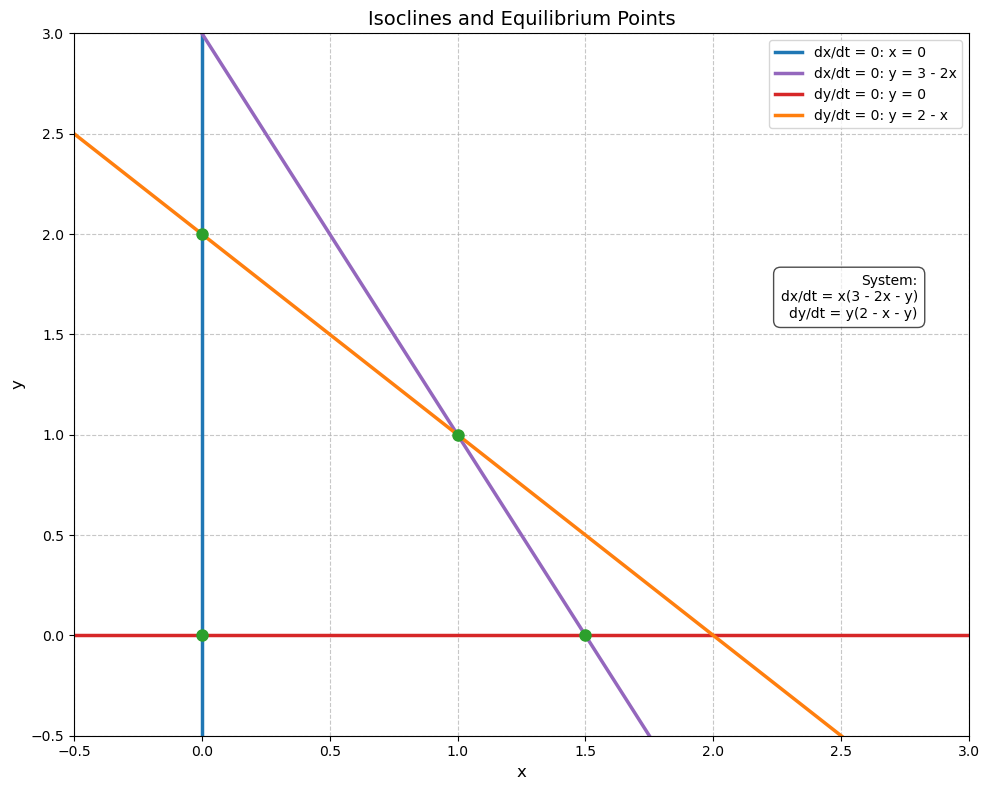


Equilibrium points (where both derivatives = 0):
Point 1: (0, 0)
Point 2: (0, 2)
Point 3: (1.5, 0)
Point 4: (1, 1)


In [24]:
def find_isoclines():
    """
    Find the isoclines (where dx/dt = 0 and dy/dt = 0) for the system:
    dx/dt = x(3 - 2x - y)
    dy/dt = y(2 - x - y)

    With enhanced color differentiation and fixed legend
    """

    # Defining symbolic variables and system:
    x, y = sp.symbols("x y")

    dx_dt_expr = x * (3 - 2 * x - y)
    dy_dt_expr = y * (2 - x - y)

    # Creating functions for dx/dt = 0 isoclines:
    dx_dt_isoclines = []

    # First solution: x = 0
    dx_dt_isoclines.append(
        lambda x: np.zeros_like(x)
    )

    # Second solution: y = 3 - 2x
    dx_dt_isoclines.append(lambda x: 3 - 2 * x)

    print("dx/dt = 0 when:")
    print("  - x = 0")
    print("  - y = 3 - 2x")

    # Creating functions for dy/dt = 0 isoclines:
    dy_dt_isoclines = []

    # First solution: y = 0
    dy_dt_isoclines.append(
        lambda x: np.zeros_like(x)
    )  # y = 0 (horizontal line at origin)

    # Second solution: y = 2 - x
    dy_dt_isoclines.append(lambda x: 2 - x)  # y = 2 - x

    print("dy/dt = 0 when:")
    print("  - y = 0")
    print("  - y = 2 - x")

    # Plotting:
    x_range = np.linspace(-0.5, 3, 100)

    plt.figure(figsize=(10, 8))

    # Colors
    colors = {
        "dx_dt_1": "#1f77b4",  # Blue
        "dx_dt_2": "#9467bd",  # Purple
        "dy_dt_1": "#d62728",  # Red
        "dy_dt_2": "#ff7f0e",  # Orange
        "equilibria": "#2ca02c",  # Green
    }

    # Plotting dx/dt = 0 isoclines:
    line1 = plt.axvline(
        x=0,
        color=colors["dx_dt_1"],
        linestyle="-",
        linewidth=2.5,
        label="dx/dt = 0: x = 0",
    )
    line2 = plt.plot(
        x_range,
        dx_dt_isoclines[1](x_range),
        color=colors["dx_dt_2"],
        linestyle="-",
        linewidth=2.5,
        label="dx/dt = 0: y = 3 - 2x",
    )[0]

    # Plotting dy/dt = 0 isoclines:
    line3 = plt.axhline(
        y=0,
        color=colors["dy_dt_1"],
        linestyle="-",
        linewidth=2.5,
        label="dy/dt = 0: y = 0",
    )
    line4 = plt.plot(
        x_range,
        dy_dt_isoclines[1](x_range),
        color=colors["dy_dt_2"],
        linestyle="-",
        linewidth=2.5,
        label="dy/dt = 0: y = 2 - x",
    )[0]

    # Defining equilibria points:
    equilibria = [(0, 0), (0, 2), (1.5, 0), (1, 1)]

    # Plotting equilibrium points:
    plt.plot(
        [p[0] for p in equilibria],
        [p[1] for p in equilibria],
        "o",
        color=colors["equilibria"],
        markersize=8,
    )

    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    plt.title("Isoclines and Equilibrium Points", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.7)

    plt.legend(
        [line1, line2, line3, line4],
        [
            "dx/dt = 0: x = 0",
            "dx/dt = 0: y = 3 - 2x",
            "dy/dt = 0: y = 0",
            "dy/dt = 0: y = 2 - x",
        ],
        loc="upper right",
        fontsize=10,
    )

    plt.xlim(-0.5, 3)
    plt.ylim(-0.5, 3)

    text_info = "System:\ndx/dt = x(3 - 2x - y)\ndy/dt = y(2 - x - y)"
    plt.text(
        2.8,
        1.8,
        text_info,
        fontsize=10,
        bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.5"),
        horizontalalignment="right",
        verticalalignment="top",
    )

    plt.tight_layout()
    plt.show()

    return {
        "dx_dt_isoclines": dx_dt_isoclines,
        "dy_dt_isoclines": dy_dt_isoclines,
        "equilibria": equilibria,
    }


# Function call:
isoclines_data = find_isoclines()

dx_dt_zeros = isoclines_data["dx_dt_isoclines"]
dy_dt_zeros = isoclines_data["dy_dt_isoclines"]
equilibria = isoclines_data["equilibria"]

print("\nEquilibrium points (where both derivatives = 0):")
for i, point in enumerate(equilibria):
    print(f"Point {i+1}: ({point[0]}, {point[1]})")